C:\Users\PoojaniRathnayakeBIS\AppData\Local\Temp\ipykernel_39880\2934263377.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M', on='Date').sum()


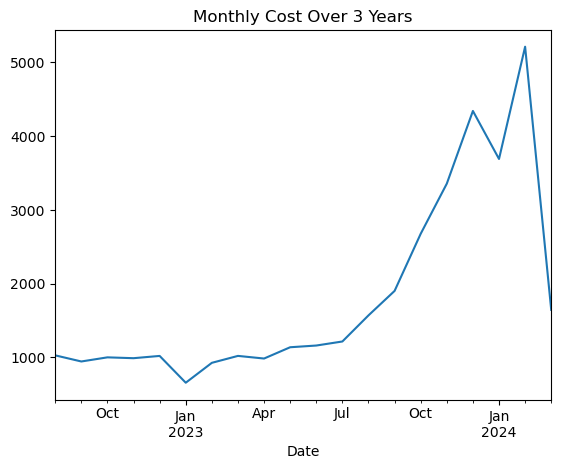

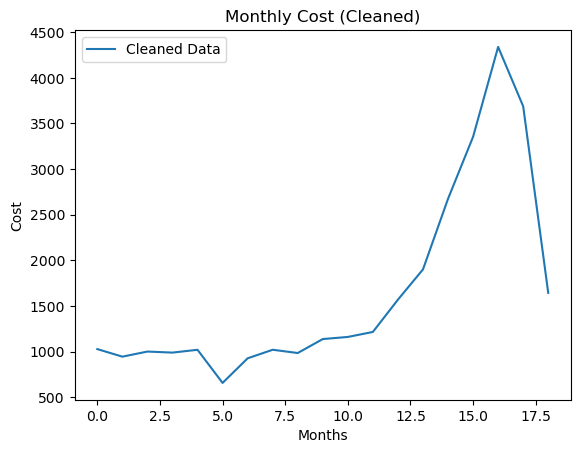

C:\Users\PoojaniRathnayakeBIS\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


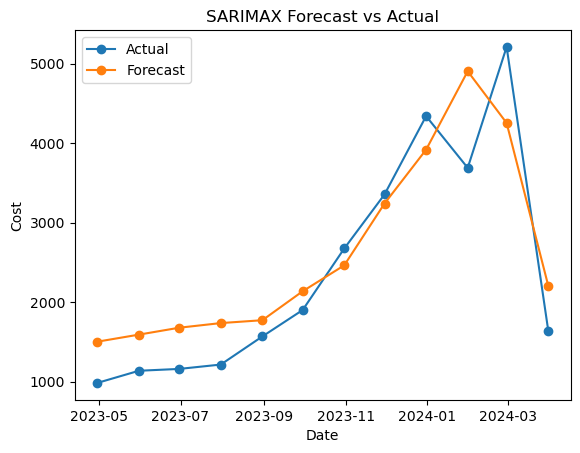

                 Actual     Forecast
Date                                
2023-04-30   983.521176  1502.150664
2023-05-31  1136.477308  1591.070469
2023-06-30  1159.672154  1677.869256
2023-07-31  1214.492964  1736.199814
2023-08-31  1568.471788  1772.360288
2023-09-30  1900.146118  2136.249488
2023-10-31  2674.407935  2462.660486
2023-11-30  3353.829158  3239.717623
2023-12-31  4339.273875  3917.654270
2024-01-31  3688.489051  4903.887435
2024-02-29  5209.832324  4252.683872
2024-03-31  1642.867141  2207.284351


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import IsolationForest

# Load the dataset
file_path = 'AzureUsageData.csv' 
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])

# Plot monthly cost for 3 years
monthly_data = data.resample('M', on='Date').sum()
monthly_costs = monthly_data['Cost']
monthly_costs.plot(title='Monthly Cost Over 3 Years')
plt.show()

# Remove outliers using Isolation Forest
def remove_outliers(data):
    isolation_forest = IsolationForest(contamination=0.05)
    data = data.values.reshape(-1, 1)
    outliers = isolation_forest.fit_predict(data)
    return data[outliers == 1].flatten()

monthly_costs_cleaned = remove_outliers(monthly_costs)

# Plot cleaned monthly cost data
plt.plot(monthly_costs_cleaned, label='Cleaned Data')
plt.title('Monthly Cost (Cleaned)')
plt.xlabel('Months')
plt.ylabel('Cost')
plt.legend()
plt.show()

# SARIMAX Forecasting
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
model = SARIMAX(monthly_costs_cleaned, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
result = model.fit()

# Forecast
forecast = result.forecast(steps=12)

# Plot forecast vs actuals
plt.plot(monthly_data.index[-12:], monthly_costs[-12:], label='Actual', marker='o')
plt.plot(monthly_data.index[-12:], forecast, label='Forecast', marker='o')
plt.title('SARIMAX Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.legend()
plt.show()

# Create DataFrame for Actual vs Forecast
forecast_df = pd.DataFrame({'Actual': monthly_costs[-12:], 'Forecast': forecast})
print(forecast_df)
